# Exploratory analysis of the dataset `best-artworks-of-all-time` from Kaggle

In this notebook we perform an exploratory analysis of the dataset `best-artworks-of-all-time` from Kaggle: https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time?resource=download

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import median

## Download data

In [11]:
! mkdir -p ~/.kaggle
! echo '{"username":"<YOUR-USERNAME>","key":"<YOUR-API-KEY>"}' >>  ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
%%capture
! pip install kaggle

In [12]:
! kaggle datasets download -d ikarus777/best-artworks-of-all-time

100%|█████████████████████████████████████▉| 2.29G/2.29G [01:51<00:00, 24.6MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [01:51<00:00, 22.1MB/s]


In [ ]:
%%capture
!unzip -o best-artworks-of-all-time.zip

In [3]:
%%capture
!unzip -o images.zip

## Explore data

In [4]:
! ls images/images

Albrecht_Dürer	   Frida_Kahlo		      Pablo_Picasso
Albrecht_Du╠êrer   Georges_Seurat	      Paul_Cezanne
Alfred_Sisley	   Giotto_di_Bondone	      Paul_Gauguin
Amedeo_Modigliani  Gustav_Klimt		      Paul_Klee
Andrei_Rublev	   Gustave_Courbet	      Peter_Paul_Rubens
Andy_Warhol	   Henri_Matisse	      Pierre-Auguste_Renoir
Camille_Pissarro   Henri_Rousseau	      Piet_Mondrian
Caravaggio	   Henri_de_Toulouse-Lautrec  Pieter_Bruegel
Claude_Monet	   Hieronymus_Bosch	      Raphael
Diego_Rivera	   Jackson_Pollock	      Rembrandt
Diego_Velazquez    Jan_van_Eyck		      Rene_Magritte
Edgar_Degas	   Joan_Miro		      Salvador_Dali
Edouard_Manet	   Kazimir_Malevich	      Sandro_Botticelli
Edvard_Munch	   Leonardo_da_Vinci	      Titian
El_Greco	   Marc_Chagall		      Vasiliy_Kandinskiy
Eugene_Delacroix   Michelangelo		      Vincent_van_Gogh
Francisco_Goya	   Mikhail_Vrubel	      William_Turner


In [227]:
! ls images/images/Jackson_Pollock

Jackson_Pollock_1.jpg  Jackson_Pollock_17.jpg Jackson_Pollock_24.jpg
Jackson_Pollock_10.jpg Jackson_Pollock_18.jpg Jackson_Pollock_3.jpg
Jackson_Pollock_11.jpg Jackson_Pollock_19.jpg Jackson_Pollock_4.jpg
Jackson_Pollock_12.jpg Jackson_Pollock_2.jpg  Jackson_Pollock_5.jpg
Jackson_Pollock_13.jpg Jackson_Pollock_20.jpg Jackson_Pollock_6.jpg
Jackson_Pollock_14.jpg Jackson_Pollock_21.jpg Jackson_Pollock_7.jpg
Jackson_Pollock_15.jpg Jackson_Pollock_22.jpg Jackson_Pollock_8.jpg
Jackson_Pollock_16.jpg Jackson_Pollock_23.jpg Jackson_Pollock_9.jpg


### Extract metadata from paintings

In [102]:
authors = defaultdict(list)
paintings = defaultdict(list)

for author in os.listdir("images/images"):
    
    paintings_filenames = os.listdir(f"images/images/{author}")
    paintings_width = []
    paintings_height = []
    
    # Iterate over author paintings
    for painting_file in paintings_filenames:
        im = Image.open(f"images/images/{author}/{painting_file}")
        width, height = im.size
        paintings_width.append(width)
        paintings_height.append(height)
        
    paintings['width'] += paintings_width
    paintings['height'] += paintings_height
    
    authors['author'].append(author)
    authors['num_paintings'].append(len(paintings_filenames))
    authors['median_width'].append(median(paintings_width))
    authors['median_height'].append(median(paintings_height))

In [161]:
authors_df = pd.DataFrame(authors).sort_values(by='num_paintings', ascending=False)
paintings_df = pd.DataFrame(paintings)

In [105]:
authors_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_paintings,49.0,165.673469,157.382812,24.0,81.0,120.0,188.0,877.0
median_width,49.0,842.489796,214.394241,500.0,667.0,800.0,996.5,1415.0
median_height,49.0,863.255102,180.603477,480.0,713.5,898.0,1024.0,1190.0


In [112]:
paintings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
width,8118.0,896.258068,361.006807,204.0,663.0,807.0,1024.0,4096.0
height,8118.0,938.228258,337.774228,226.0,757.0,923.0,1024.0,3826.0


#### Number of paintings per author

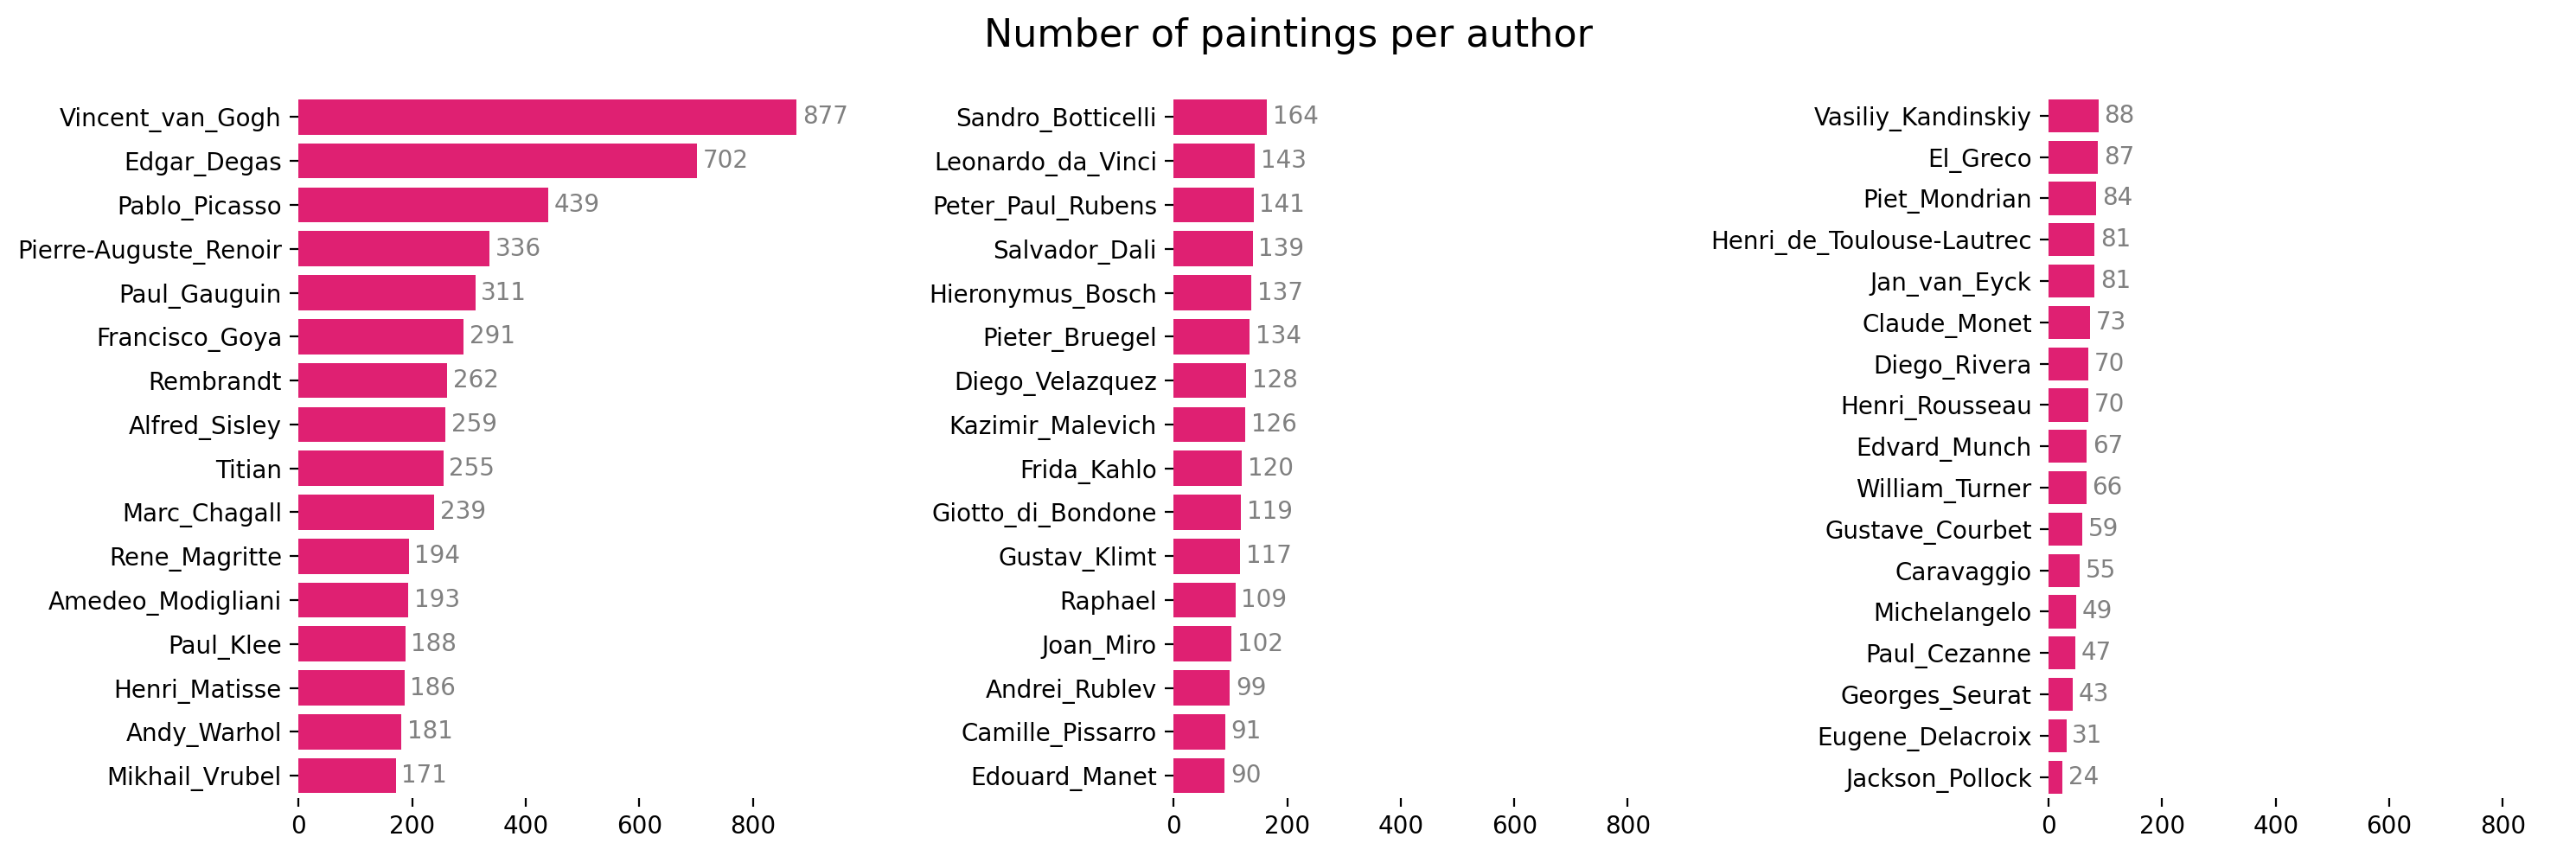

In [131]:
# Divide the DataFrame into 3 segments
part_size = len(df) // 3
df1 = authors_df.iloc[:part_size]
df2 = authors_df.iloc[part_size:part_size*2]
df3 = authors_df.iloc[part_size*2:]

# Create the figure and subplots
fig, axes = plt.subplots(ncols=3, figsize=(15,5), dpi=200)

for data, ax in zip([df1, df2, df3], axes):
    sns.barplot(x='num_paintings', y='author', data=data, ax=ax, color='#ff006e')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim([0, 900])
    
    # Add value labels to bars
    for j, v in enumerate(data['num_paintings']):
        ax.text(v + 10, j, str(v), ha='left', va='center', fontsize=10, color='gray')


# Add some extra styling
sns.despine(left=True, bottom=True)
plt.suptitle("Number of paintings per author", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])

#### Author - Median width and median height of painting images

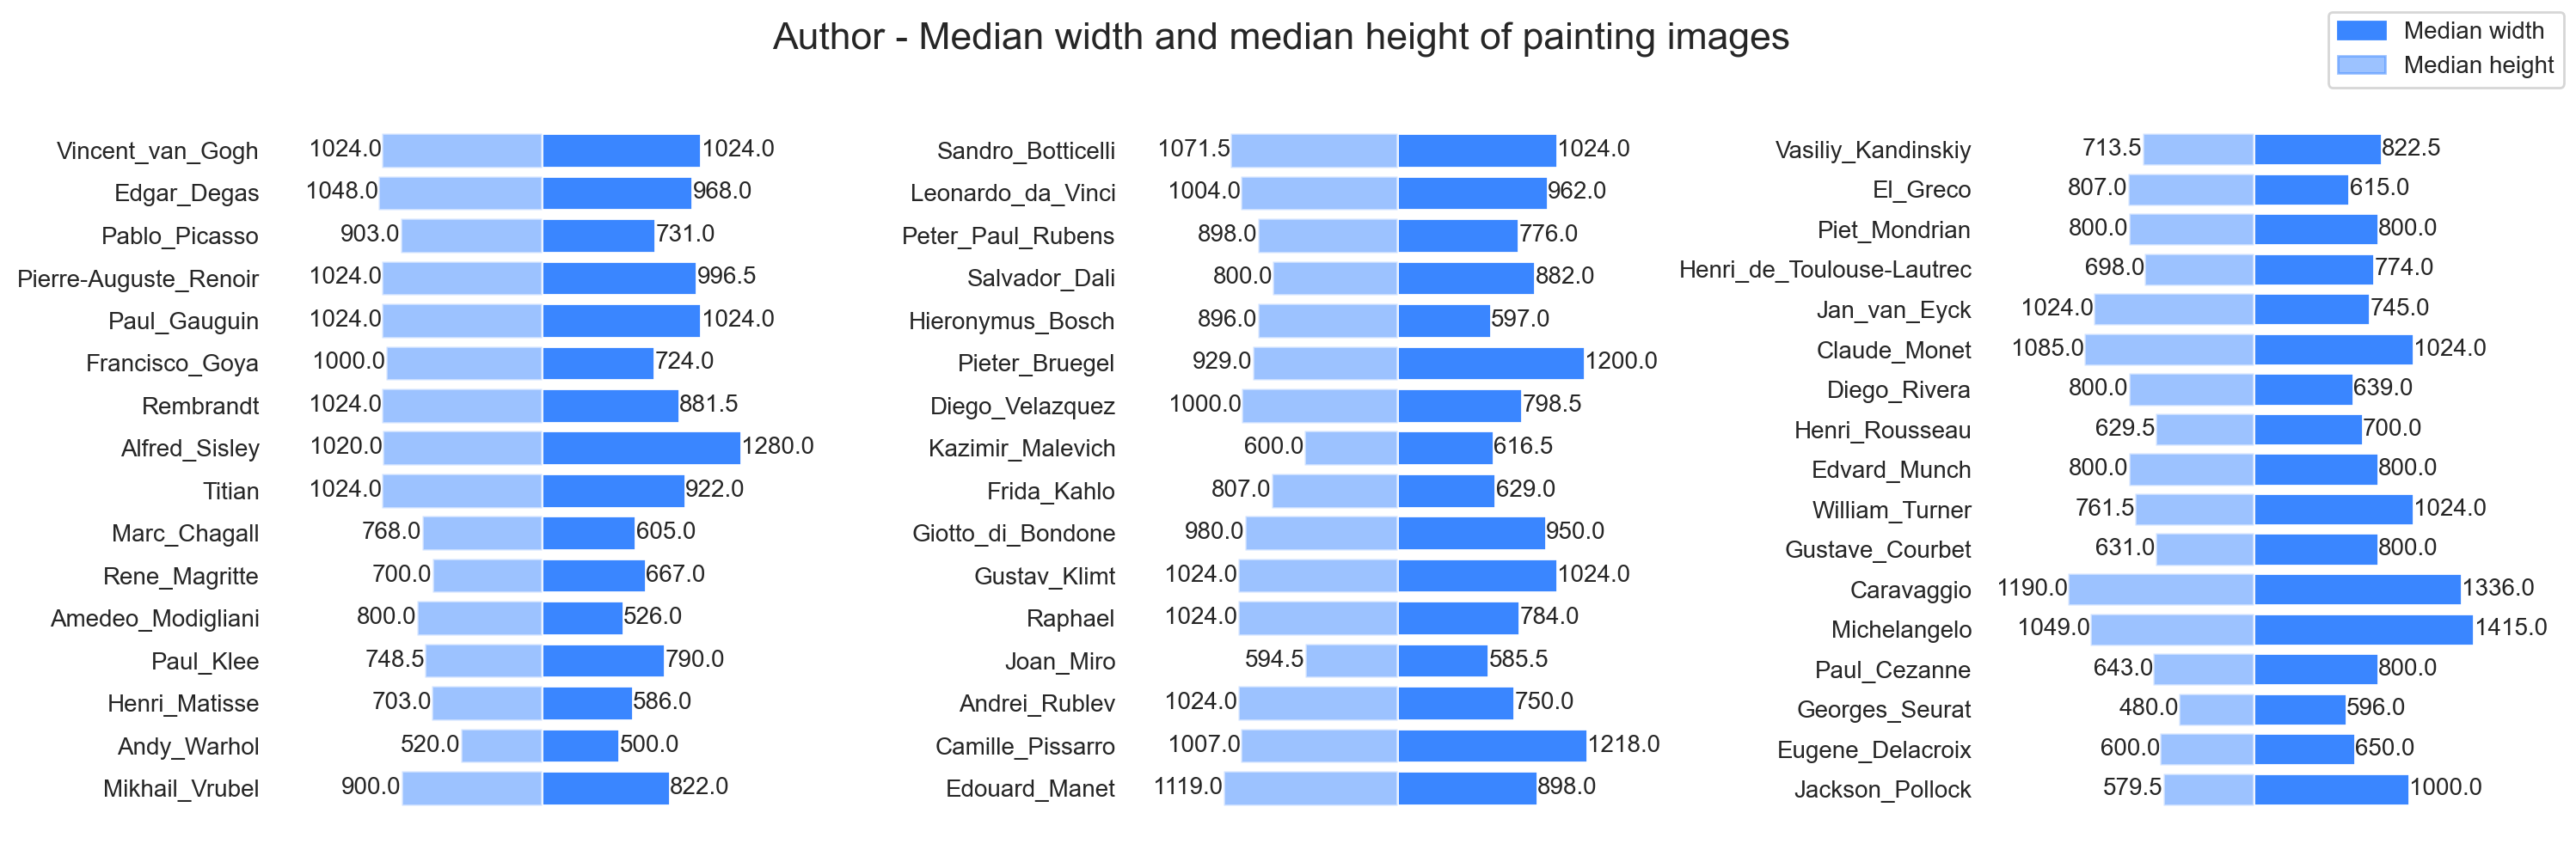

In [194]:
# Divide the DataFrame into 3 segments
part_size = len(df) // 3
df1 = authors_df.iloc[:part_size]
df2 = authors_df.iloc[part_size:part_size*2]
df3 = authors_df.iloc[part_size*2:]

# Create the figure and subplots
fig, axes = plt.subplots(ncols=3, figsize=(15,5), dpi=200)

color = '#3a86ff'

for data, ax in zip([df1, df2, df3], axes):
    
    data = data[::-1] # Matplotlib's bar chart inverts the series
    
    ax.barh(data['author'], data['median_width'], color=color)
    ax.barh(data['author'], -data['median_height'], color=color, alpha=0.5)
    ax.set_xlim([-1700, 1500])
    
    # Add value labels to bars
    for j, (w, h) in enumerate(zip(data['median_width'], data['median_height'])):
        ax.text(w + 1, j, str(w), ha='left', va='center', fontsize=10)
        ax.text(-h - 1, j, str(h), ha='right', va='center', fontsize=10)
        
    # Remove axes visibility   
    ax.xaxis.set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


# Add overall title
fig.suptitle('Author - Median width and median height of painting images', fontsize=16)

# Add legend
handles = [
    plt.Rectangle((0,0),1,1, color=color, alpha=1),
    plt.Rectangle((0,0),1,1, color=color, alpha=0.5)
]
labels = ['Median width', 'Median height']
fig.legend(handles, labels, loc='upper right')

# Display plots
plt.tight_layout(rect=[0, 0, 1, 0.92])

sns.set_style('white')


#### Painting images size distribution

Text(0.5, 0.98, 'Painting images size distribution \n')

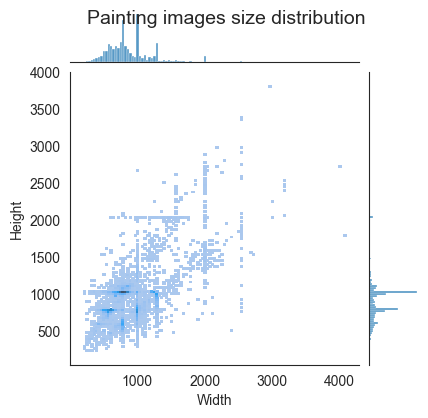

In [228]:
g = sns.JointGrid(data=paintings_df, x="width", y="height")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.histplot)

g.fig.set_size_inches(4, 4)
g.fig.set_dpi(100)
g.set_axis_labels("Width", "Height")
g.fig.suptitle("Painting images size distribution \n", fontsize=14)

### Plot a sample of images

<ipython-input-239-b0e306301d95>:33: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((200, 200), Image.ANTIALIAS)


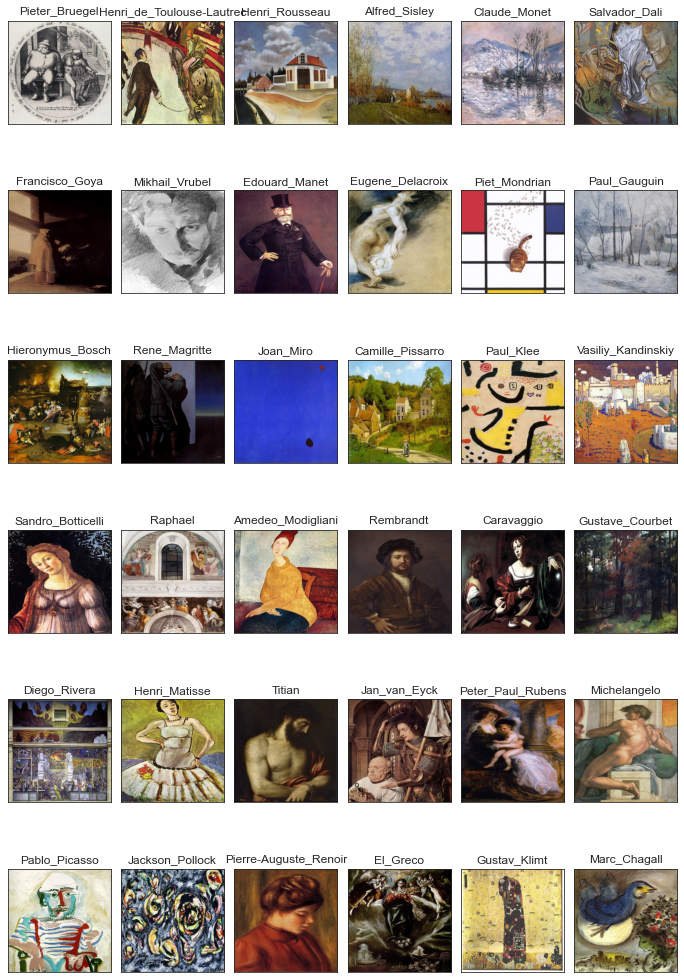

In [239]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Set path to directory containing image folders
img_dir = "images/images"

# Get a list of all author directories in the img_dir directory
author_dirs = os.listdir(img_dir)

# Select 10 random author directories
n_authors = 36 # Should be multiple of `n_cols`
selected_authors = random.sample(author_dirs, n_authors)

# Create a 2x5 grid of subplots
n_cols = 6
n_rows = n_authors // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 3*n_rows))

# Loop over the selected authors and plot a random image from each author
for i, author in enumerate(selected_authors):
    # Get a list of all image files in the author directory
    img_files = [f for f in os.listdir(os.path.join(img_dir, author)) if f.endswith(".jpg")]
    
    # Select a random image from the author directory
    img_file = random.choice(img_files)
    
    # Load the image using the Pillow library
    img = Image.open(os.path.join(img_dir, author, img_file))
    
    # Resize the image to fit in the subplot
    img = img.resize((200, 200), Image.ANTIALIAS)
    
    # Plot the image in the corresponding subplot
    row = i // n_cols
    col = i % n_cols
    axs[row, col].imshow(img)
    
    # Add the author name as a title to the subplot
    axs[row, col].set_title(author)

# Adjust spacing between subplots and remove tick marks
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

# Show the plot
plt.show()


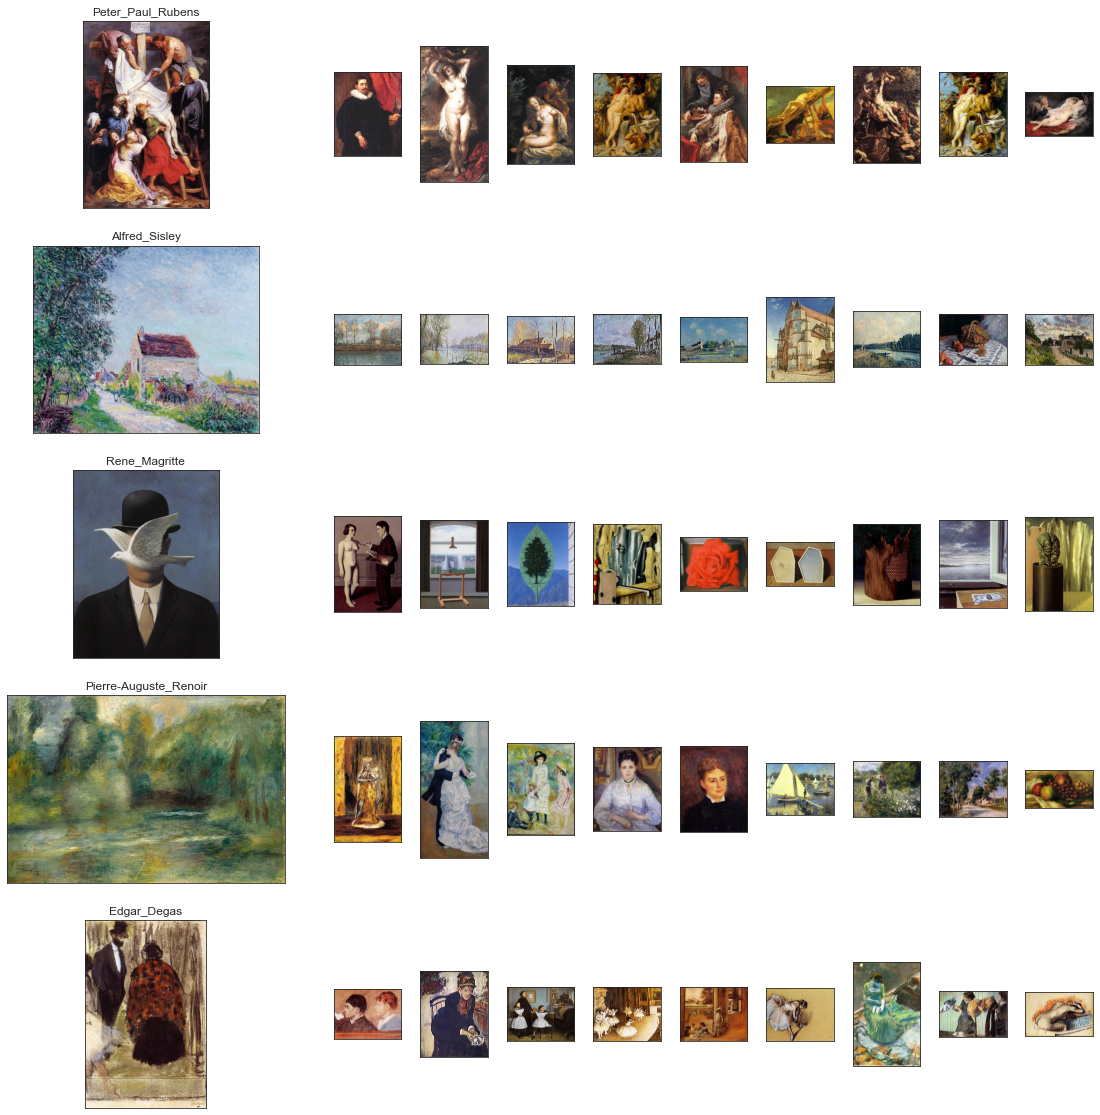

In [242]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the directory containing the author directories
images_dir = "images/images"

# Get a list of all the author directories
authors = os.listdir(images_dir)
authors = random.sample(author_dirs, 5)

# Calculate the total number of subplots needed
n_subplots = len(authors) * 10

# Create a figure with one row of 10 subplots per author
fig, axes = plt.subplots(nrows=len(authors), ncols=10, figsize=(20, 20),
                         gridspec_kw={'width_ratios': [5] + [1] * 9})

# Loop over each author directory
for i, author in enumerate(authors):
    author_dir = os.path.join(images_dir, author)
    
    # Get a list of all the image filenames in the author directory
    images = os.listdir(author_dir)
    
    # Choose 10 random images from the author directory
    random_images = random.sample(images, 10)
    
    # Loop over each subplot in the row
    for j, ax in enumerate(axes[i]):
        
        # Load and display the image
        img = Image.open(os.path.join(author_dir, random_images[j]))
        ax.imshow(img)
        
        # Set the subplot title to the author name (only for the first column)
        if j == 0:
            ax.set_title(author, fontsize=12)
        
        # Remove the axis ticks and labels
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        
plt.show()
